In [22]:
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass

-1.7383657469481728 -1.4329390052332245
0


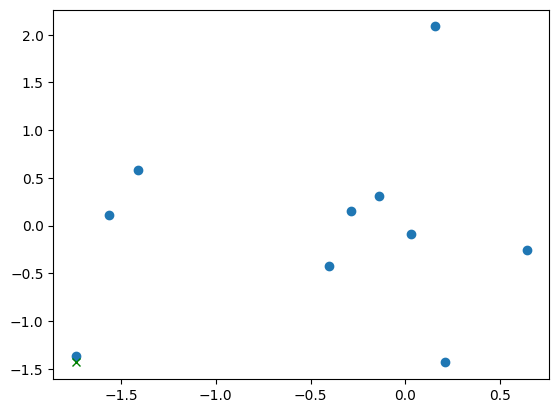

In [37]:
@dataclass
class Point:
    x: float
    y: float
    is_dominated: bool = False

x_data = np.random.normal(0, 1, 10)
y_data = np.random.normal(0, 1, 10)
plt.scatter(x_data, y_data)

data = []
for point in enumerate(zip(x_data, y_data)):
    index = point[0]
    x, y = point[1]

    point = Point(x, y)
    data.append(point)

# pareto front (minimize x and y)
global_best_x = np.inf
global_best_y = np.inf

# find global best
for point in data:
    if point.x < global_best_x:
        global_best_x = point.x
    if point.y < global_best_y:
        global_best_y = point.y

print(global_best_x, global_best_y)
plt.plot(global_best_x, global_best_y, 'x', color='green')

for point in data:
    if point.x <= global_best_x and point.y <= global_best_y:
        if point.x < global_best_x or point.y < global_best_y:
            plt.plot(point.x, point.y, 'x', color='red')
        else:
            point.is_dominated = True

count = 0
for point in data:
    if point.is_dominated:
        count +=1
print(count)

plt.show()

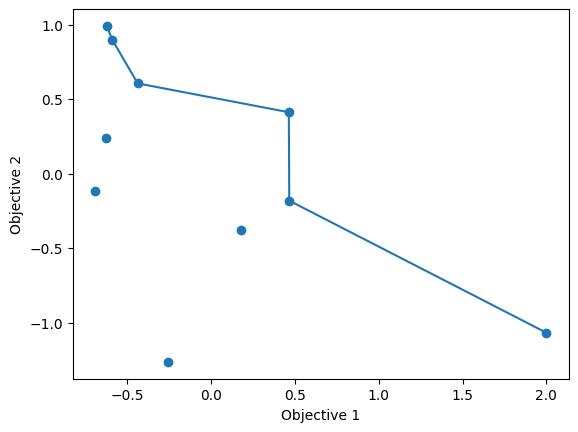

In [66]:
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.scatter(Xs,Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.plot(pf_X, pf_Y)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.show()

x_data = np.random.normal(0, 1, 10)
y_data = np.random.normal(0, 1, 10)
plot_pareto_frontier(x_data, y_data)

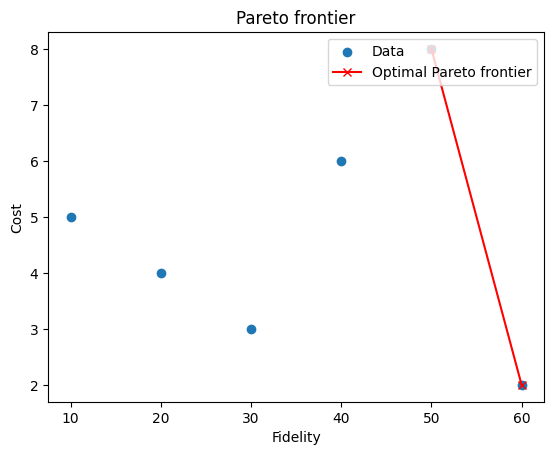

In [68]:
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    
    for pair in sorted_list[1:]:
        if maxX and maxY:
            if pair[0] >= pareto_front[-1][0] and pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        elif maxX:
            if pair[0] >= pareto_front[-1][0]:
                pareto_front.append(pair)
        elif maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.scatter(Xs, Ys, label='Data')  # Plot the data points
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.plot(pf_X, pf_Y, 'x-', color='red', label='Optimal Pareto frontier')  # Plot the Pareto frontier
    plt.xlabel("Fidelity")  # X-axis label
    plt.ylabel("Cost")  # Y-axis label
    plt.title("Pareto frontier")  # Title of the plot
    plt.legend(loc="upper right")  # Add a legend to the plot
    plt.show()  # Display the plot

# Example usage:
Xs = [10, 20, 30, 40, 50, 60]
Ys = [5, 4, 3, 6, 8, 2]
plot_pareto_frontier(Xs, Ys, maxX=False, maxY=True)  # Example with maxY=True (maximize Y)
